In [16]:
import zipfile
import tensorflow as tf 
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [7]:
with zipfile.ZipFile('raw data/test.zip', 'r') as files:
    files.extractall('test data')

with zipfile.ZipFile('raw data/training.zip', 'r') as files:
    files.extractall('train data')

In [3]:
TRAINING_FILE_PATH = 'train data/training.csv'
VALIDATION_FILE_PATH = 'test data/test.csv'

In [4]:
import pandas as pd

train_data = pd.read_csv(TRAINING_FILE_PATH)
val_data = pd.read_csv(VALIDATION_FILE_PATH)

Exploring the data

In [198]:
print(train_data.head(0))
print(val_data.head(1))

Empty DataFrame
Columns: [left_eye_center_x, left_eye_center_y, right_eye_center_x, right_eye_center_y, left_eye_inner_corner_x, left_eye_inner_corner_y, left_eye_outer_corner_x, left_eye_outer_corner_y, right_eye_inner_corner_x, right_eye_inner_corner_y, right_eye_outer_corner_x, right_eye_outer_corner_y, left_eyebrow_inner_end_x, left_eyebrow_inner_end_y, left_eyebrow_outer_end_x, left_eyebrow_outer_end_y, right_eyebrow_inner_end_x, right_eyebrow_inner_end_y, right_eyebrow_outer_end_x, right_eyebrow_outer_end_y, nose_tip_x, nose_tip_y, mouth_left_corner_x, mouth_left_corner_y, mouth_right_corner_x, mouth_right_corner_y, mouth_center_top_lip_x, mouth_center_top_lip_y, mouth_center_bottom_lip_x, mouth_center_bottom_lip_y, Image]
Index: []

[0 rows x 31 columns]
   ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...


In [38]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [37]:
print(val_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  1783 non-null   int64 
 1   Image    1783 non-null   object
dtypes: int64(1), object(1)
memory usage: 28.0+ KB
None


In [66]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [199]:
val_data.isnull().sum()

ImageId    0
Image      0
dtype: int64

In [72]:
train_data['left_eye_center_x'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7044    False
7045    False
7046    False
7047    False
7048    False
Name: left_eye_center_x, Length: 7049, dtype: bool

Parsing the data

In [5]:
def split_data(data_set):
    x = []
    for i in range(len(data_set)):
        x.append(data_set['Image'][i].split(' '))
    x = np.array(x, dtype= 'float')
    
    y = data_set.iloc[:, :-1].values
    return x,y
    

In [38]:
X_train, Y_train = split_data(train_data[:2284])
X_val, _ = split_data(val_data)

In [153]:
print(type(X_train))

print(Y_train[-1])
print(len(Y_train))

<class 'numpy.ndarray'>
[66.6837551  34.48342857 30.7844898  38.57893878 59.25534694 36.06514286
 73.94269388 34.62465306 37.47853061 39.39804082 22.05681633 40.33012245
 53.29978747 29.98765747 80.94778747 27.97753502 38.77929767 33.30259624
 14.79888951 35.98275951 49.97387755 59.26938775 72.60043255 71.86204134
 34.23275908 77.3394291  51.59945296 75.96359236 52.92337132 82.66106175]
2284


Imputing NaN values and reshaping the data

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(Y_train)
Y_train = imputer.transform(Y_train)


In [182]:
print(Y_train[556,0])
print(Y_train[2239,0])
print(Y_train[1600,4])
print(Y_train[1654,4])
print(X_train.shape)
print(Y_train.shape)

65.7826242038
66.1211401397062
59.336079734
59.15933943740389
(2284, 9216)
(2284, 30)


In [8]:
X_train = X_train.reshape(-1, 96, 96)
print(X_train.shape)

(2284, 96, 96)


In [41]:
X_val = X_val.reshape(-1, 96, 96)
print(X_val.shape)

(1783, 96, 96)


In [9]:
X_train = X_train/255.0

In [42]:
X_val = X_val/255.0

Preview some data

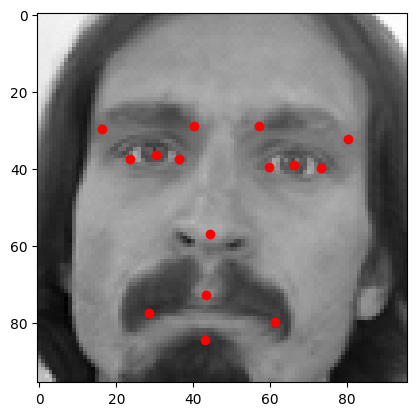

In [195]:
plt.imshow(X_train[0], cmap = 'grey')
plt.scatter(Y_train[0][::2], Y_train[0][1::2], marker='o', c='red')

Splitting the data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2)

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)

Modeling

In [12]:
def model_prep(arch_func,input_shape, epochs):
    model = arch_func(input_shape)
    model.compile(optimizer = 'Adam',
                  loss = 'mse',
                  metrics = ['accuracy'])
    history = model.fit(train_dataset, epochs = epochs, validation_data = test_dataset)
    return history, model

In [13]:
def inception_module(x, filters):
    conv1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    
    conv3x3_reduce = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(conv3x3_reduce)
    
    conv5x5_reduce = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    conv5x5 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(conv5x5_reduce)
    
    maxpool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpool_proj = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(maxpool)
    
    inception_output = layers.concatenate([conv1x1, conv3x3, conv5x5, maxpool_proj], axis=-1)
    return inception_output

In [214]:
def googlenet(input_shape):
    input_layer = layers.Input(shape=input_shape)
    
    # Initial Convolution and MaxPooling
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    # Inception Modules
    x = inception_module(x, [64, 64, 128, 32, 32, 32])
    x = inception_module(x, [128, 128, 192, 96, 96, 64])
    
    # Main Classifier
    x = layers.AveragePooling2D((7, 7), strides=(1, 1))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    outputs = layers.Dense(30, activation='linear')(x)
    
    model = tf.keras.models.Model(inputs=input_layer, outputs=outputs)
    
    return model

In [215]:
input_shape = (96, 96, 1)
history, model = model_prep(googlenet,input_shape,10)

Epoch 1/10
29/29 [==============================] - 22s 727ms/step - loss: 362.5806 - accuracy: 0.4105 - val_loss: 37.3544 - val_accuracy: 0.6805
Epoch 2/10
29/29 [==============================] - 20s 700ms/step - loss: 20.8756 - accuracy: 0.6864 - val_loss: 15.8894 - val_accuracy: 0.6805
Epoch 3/10
29/29 [==============================] - 22s 763ms/step - loss: 14.3454 - accuracy: 0.6864 - val_loss: 13.4060 - val_accuracy: 0.6805
Epoch 4/10
29/29 [==============================] - 21s 714ms/step - loss: 13.0166 - accuracy: 0.6864 - val_loss: 13.0194 - val_accuracy: 0.6805
Epoch 5/10
29/29 [==============================] - 21s 724ms/step - loss: 12.7573 - accuracy: 0.6864 - val_loss: 12.3922 - val_accuracy: 0.6805
Epoch 6/10
29/29 [==============================] - 21s 714ms/step - loss: 12.4105 - accuracy: 0.6864 - val_loss: 12.2142 - val_accuracy: 0.6805
Epoch 7/10
29/29 [==============================] - 21s 716ms/step - loss: 12.0309 - accuracy: 0.6858 - val_loss: 11.8154 - val_a

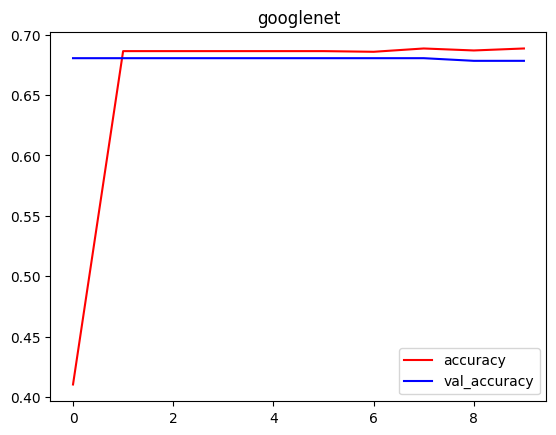

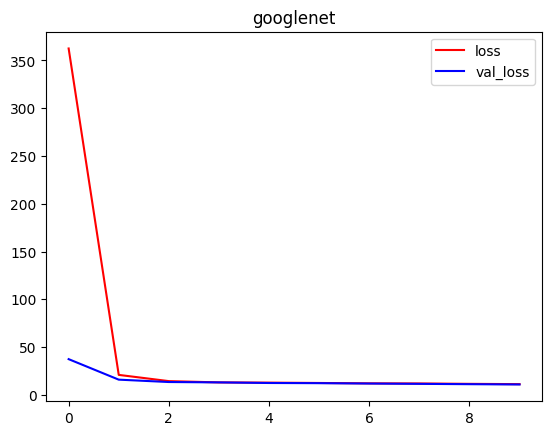

In [226]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
history_epochs = range(len(acc))

plt.plot(history_epochs, acc, 'r', label='accuracy')
plt.plot(history_epochs, val_acc, 'blue', label='val_accuracy')
plt.title('googlenet')
plt.legend()
plt.figure()

plt.plot(history_epochs, loss, 'r', label='loss')
plt.plot(history_epochs, val_loss, 'blue', label='val_loss')
plt.title('googlenet')
plt.legend()

plt.show()

In [17]:
def cnn_v1(input_shape):

    input_img = tf.keras.Input(shape=input_shape)

    layer=layers.Conv2D(filters= 38 , kernel_size= 5,strides=(2, 2),padding='same')(input_img)
    layer=layers.BatchNormalization(axis=3)(layer,training=True)
    layer=layers.ReLU()(layer)
    layer=layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(layer)

    layer=layers.Conv2D(filters= 114 , kernel_size= 3 ,strides=(2, 2),padding='same')(layer)
    layer=layers.BatchNormalization(axis=3)(layer,training=True)
    layer=layers.ReLU()(layer)
    
    layer=layers.Conv2D(filters= 196 , kernel_size= 3 ,strides=(2, 2), padding='same')(layer)
    layer=layers.BatchNormalization(axis=3)(layer,training=True)
    layer=layers.ReLU()(layer)

    layer=layers.Flatten()(layer)

    layer=layers.Dense(units=500, activation='relu')(layer)
    layer=layers.Dropout(0.2)(layer)

    outputs=layers.Dense(units= 30 , activation='linear')(layer)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [19]:
history, model = model_prep(cnn_v1, input_shape, 100)

Epoch 1/100
29/29 [==============================] - 2s 59ms/step - loss: 383.8140 - accuracy: 0.2523 - val_loss: 26.1953 - val_accuracy: 0.2604
Epoch 2/100
29/29 [==============================] - 2s 58ms/step - loss: 62.4383 - accuracy: 0.3437 - val_loss: 11.0339 - val_accuracy: 0.7024
Epoch 3/100
29/29 [==============================] - 2s 58ms/step - loss: 45.2563 - accuracy: 0.3870 - val_loss: 8.5595 - val_accuracy: 0.7046
Epoch 4/100
29/29 [==============================] - 2s 58ms/step - loss: 38.0211 - accuracy: 0.4401 - val_loss: 8.6443 - val_accuracy: 0.7112
Epoch 5/100
29/29 [==============================] - 2s 58ms/step - loss: 32.7336 - accuracy: 0.4652 - val_loss: 7.1410 - val_accuracy: 0.7199
Epoch 6/100
29/29 [==============================] - 2s 57ms/step - loss: 29.5592 - accuracy: 0.4997 - val_loss: 6.7017 - val_accuracy: 0.7243
Epoch 7/100
29/29 [==============================] - 2s 57ms/step - loss: 26.6217 - accuracy: 0.5156 - val_loss: 7.2064 - val_accuracy: 0.7

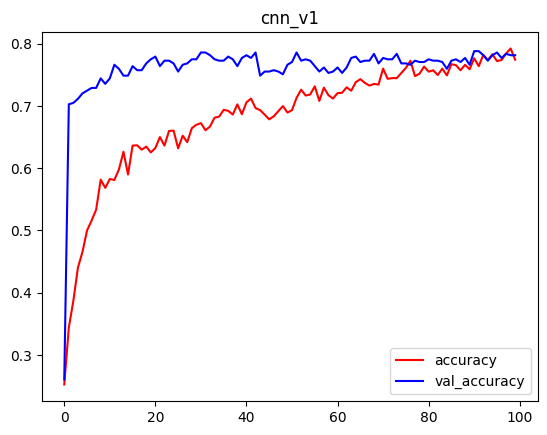

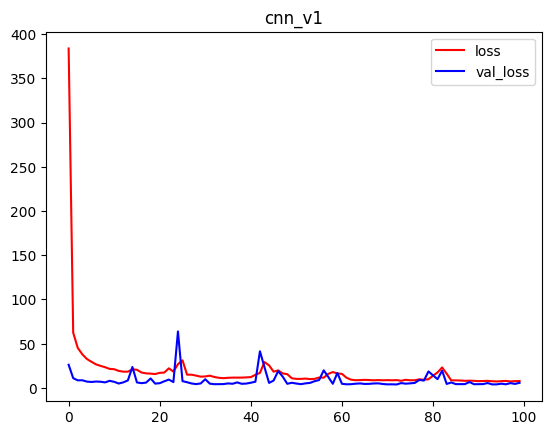

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
history_epochs = range(len(acc))

plt.plot(history_epochs, acc, 'r', label='accuracy')
plt.plot(history_epochs, val_acc, 'blue', label='val_accuracy')
plt.title('cnn_v1')
plt.legend()
plt.figure()

plt.plot(history_epochs, loss, 'r', label='loss')
plt.plot(history_epochs, val_loss, 'blue', label='val_loss')
plt.title('cnn_v1')
plt.legend()

plt.show()

In [26]:
def cnn_v2(input_shape):

    input_img = tf.keras.Input(shape=input_shape)
    
    layer=layers.Conv2D(filters= 38 , kernel_size= 5,strides=(2, 2),padding='same')(input_img)
    layer=layers.BatchNormalization(axis=3)(layer,training=True)
    layer=layers.ReLU()(layer)
    layer=layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(layer)

    layer=layers.DepthwiseConv2D(kernel_size= 3 ,strides=(2, 2),padding='same')(layer)
    layer=layers.BatchNormalization(axis=3)(layer,training=True)
    layer=layers.ReLU()(layer)
    
    layer=layers.Conv2D(filters= 196 , kernel_size= 3,strides=(2, 2),padding='same')(layer)
    layer=layers.BatchNormalization(axis=3)(layer,training=True)
    layer=layers.ReLU()(layer)
    
    layer=layers.Flatten()(layer)

    layer=layers.Dense(units=500, activation='relu')(layer)
    layer=layers.Dropout(0.2)(layer)

    outputs=layers.Dense(units= 30 , activation='linear')(layer)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [27]:
cnn_v2_history, cnn_v2_model = model_prep(cnn_v2, input_shape, 100)

Epoch 1/100
29/29 [==============================] - 2s 49ms/step - loss: 385.0444 - accuracy: 0.2490 - val_loss: 29.4175 - val_accuracy: 0.7024
Epoch 2/100
29/29 [==============================] - 1s 46ms/step - loss: 60.4793 - accuracy: 0.3799 - val_loss: 10.7666 - val_accuracy: 0.7068
Epoch 3/100
29/29 [==============================] - 1s 46ms/step - loss: 45.0648 - accuracy: 0.4269 - val_loss: 9.0805 - val_accuracy: 0.7046
Epoch 4/100
29/29 [==============================] - 1s 45ms/step - loss: 37.1433 - accuracy: 0.4554 - val_loss: 7.9907 - val_accuracy: 0.7068
Epoch 5/100
29/29 [==============================] - 1s 45ms/step - loss: 32.5367 - accuracy: 0.4860 - val_loss: 7.5897 - val_accuracy: 0.7155
Epoch 6/100
29/29 [==============================] - 1s 45ms/step - loss: 29.4621 - accuracy: 0.4910 - val_loss: 8.0405 - val_accuracy: 0.7133
Epoch 7/100
29/29 [==============================] - 1s 45ms/step - loss: 26.4786 - accuracy: 0.5369 - val_loss: 6.3199 - val_accuracy: 0.7

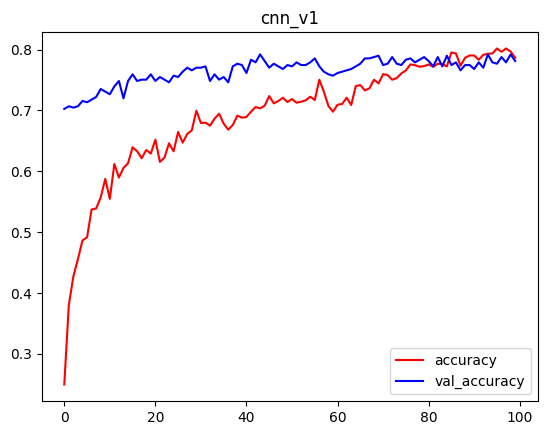

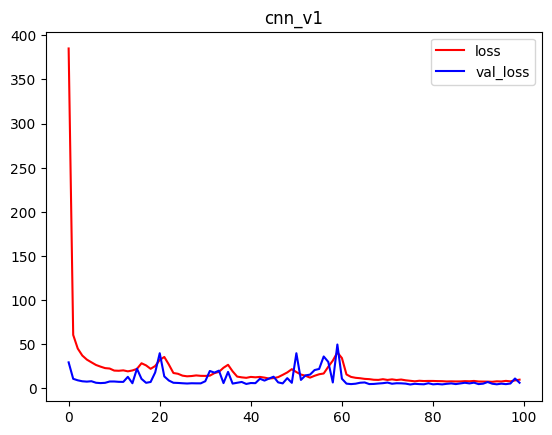

In [28]:
acc = cnn_v2_history.history['accuracy']
val_acc = cnn_v2_history.history['val_accuracy']
loss = cnn_v2_history.history['loss']
val_loss = cnn_v2_history.history['val_loss']
history_epochs = range(len(acc))

plt.plot(history_epochs, acc, 'r', label='accuracy')
plt.plot(history_epochs, val_acc, 'blue', label='val_accuracy')
plt.title('cnn_v1')
plt.legend()
plt.figure()

plt.plot(history_epochs, loss, 'r', label='loss')
plt.plot(history_epochs, val_loss, 'blue', label='val_loss')
plt.title('cnn_v1')
plt.legend()

plt.show()

In [43]:
predictions = cnn_v2_model.predict(X_val)

56/56 [==============================] - 1s 10ms/step


In [49]:
def plot_prediction(keypoints, image, ax):
    ax.imshow(image, cmap='gray')
    ax.scatter(keypoints[::2], keypoints[1::2], c='red', marker='o')
    ax.axis('off')

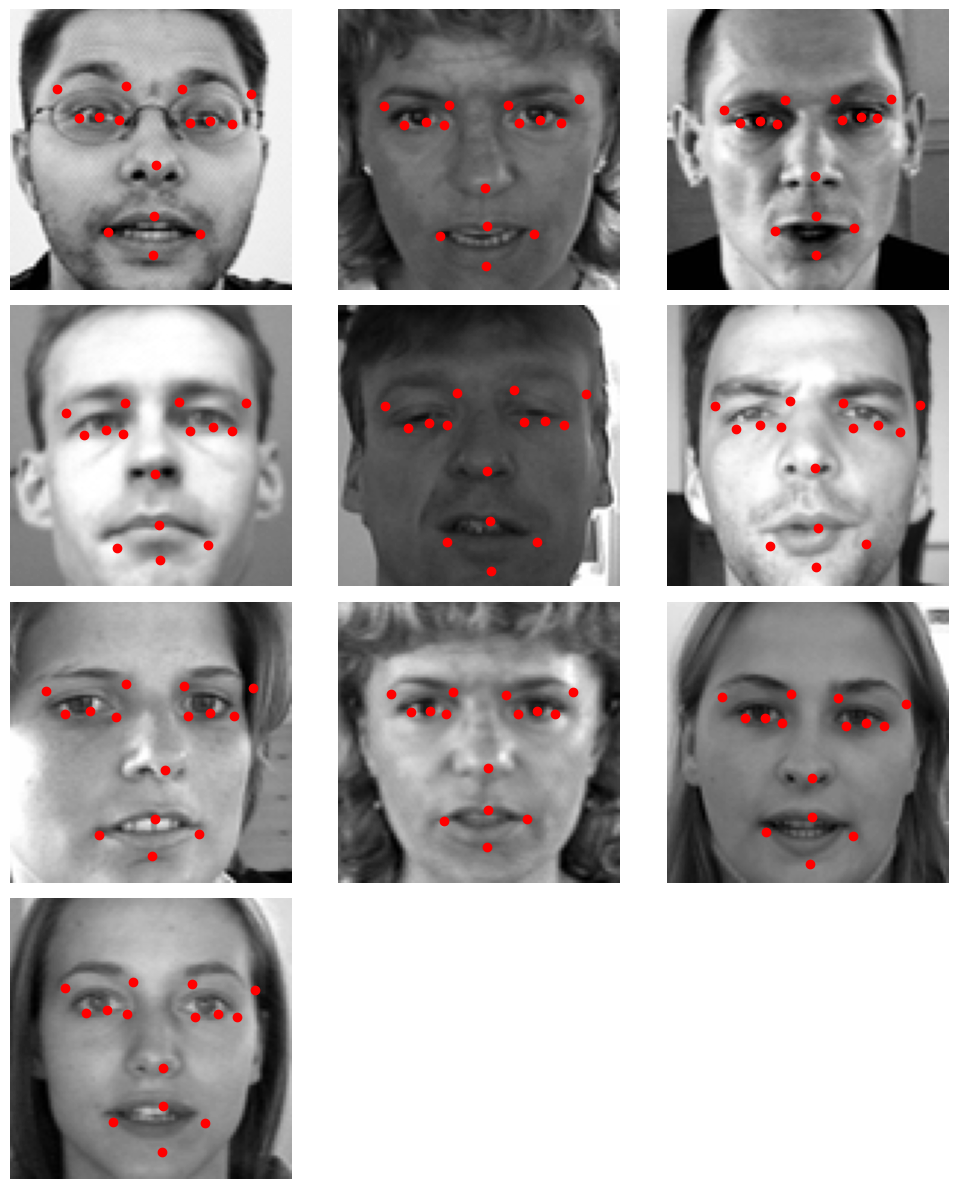

In [55]:
num_images = 10  
num_cols = 3  
num_rows = num_images // num_cols + (num_images % num_cols > 0)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows)) 
axs = axs.flatten() 

for i in range(num_images):
    plot_prediction(predictions[i], X_val[i], axs[i])

for ax in axs[num_images:]:
    ax.axis('off')

plt.tight_layout()
plt.show()